# TAREA 2 - MACHINE LEARNING 1
## LOGISTIC REGRESSION AND MULTICLASS EXTENSIONS



INTEGRANTES:


1.   Chamorro Alva, Melvin
2.   Garcia Iraita, Lucy


1.   Luna Carrera, Marisol





### PARTE A: BINARY LOGISTIC REGRESSION FROM SCRATCH

#### PREPARANDO LOS DATOS

Para empezar, cargaremos la base de datos de enfermedades cardíacas del repositorio de la UCI ejecutando:

In [178]:
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

heart_disease = fetch_ucirepo(id = 45)
X = heart_disease.data.features # features
Y = heart_disease.data.targets # heart disease diagnosis

A continuación, procederemos a observar los valores únicos y la frecuencia de la variable Y:

In [179]:
import pandas as pd
print("Clases de la variable Y:")
print(Y.value_counts().sort_index())

Clases de la variable Y:
num
0      164
1       55
2       36
3       35
4       13
Name: count, dtype: int64


Como mencionó el profesor, la variable Y tiene más de dos clases. Por lo que, se necesita recodificar para hacerla binaria y pueda indicarnos si el paciente tiene una enfermedad cardíaca o no. Para ello, tomaremos 0, cuando el valor original es 0, para indicar que el paciente NO tiene una enfermedad cardíaca; y 1, en caso el valor original sea 1, 2, 3 o 4, para indicar si el paciente SÍ tiene una enfermedad cardíaca.

In [180]:
Y = (Y != 0).astype(int).squeeze()

In [181]:
print("Nuevas clases de la variable Y:")
print(Y.value_counts().sort_index())

Nuevas clases de la variable Y:
num
0    164
1    139
Name: count, dtype: int64


Realizamos un gráfico de barras para una mejor visualización

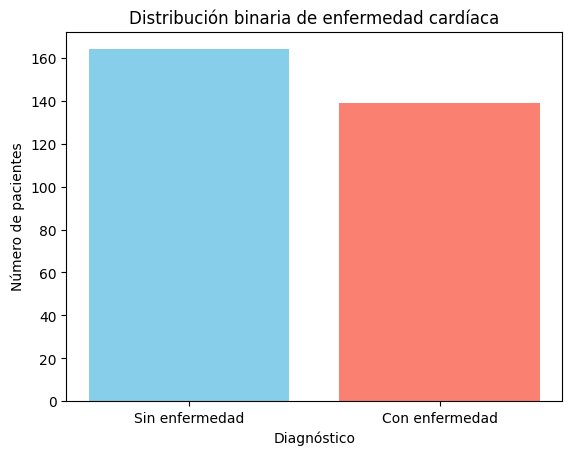

In [182]:
import matplotlib.pyplot as plt
countsY = Y.value_counts().sort_index()
plt.bar(countsY.index, countsY.values, color=['skyblue', 'salmon'])
plt.xticks([0, 1], ['Sin enfermedad', 'Con enfermedad'])
plt.xlabel('Diagnóstico')
plt.ylabel('Número de pacientes')
plt.title('Distribución binaria de enfermedad cardíaca')
plt.show()

Ahora procedemos a evaluar los tipos de la variable X:

In [183]:
X.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


Observamos que todas las variables son númericas, sin embargo, algunas de ellas pueden ser categóricas (como "sex"). Evaluemos con mayor profundidad:

In [184]:
X_ver = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak',	'slope', 'ca',	'thal']
for col in X_ver:
    print(f"{col}: {X[col].unique().tolist()}")

age: [63, 67, 37, 41, 56, 62, 57, 53, 44, 52, 48, 54, 49, 64, 58, 60, 50, 66, 43, 40, 69, 59, 42, 55, 61, 65, 71, 51, 46, 45, 39, 68, 47, 34, 35, 29, 70, 77, 38, 74, 76]
sex: [1, 0]
cp: [1, 4, 3, 2]
trestbps: [145, 160, 120, 130, 140, 172, 150, 110, 132, 117, 135, 112, 105, 124, 125, 142, 128, 170, 155, 104, 180, 138, 108, 134, 122, 115, 118, 100, 200, 94, 165, 102, 152, 101, 126, 174, 148, 178, 158, 192, 129, 144, 123, 136, 146, 106, 156, 154, 114, 164]
chol: [233, 286, 229, 250, 204, 236, 268, 354, 254, 203, 192, 294, 256, 263, 199, 168, 239, 275, 266, 211, 283, 284, 224, 206, 219, 340, 226, 247, 167, 230, 335, 234, 177, 276, 353, 243, 225, 302, 212, 330, 175, 417, 197, 198, 290, 253, 172, 273, 213, 305, 216, 304, 188, 282, 185, 232, 326, 231, 269, 267, 248, 360, 258, 308, 245, 270, 208, 264, 321, 274, 325, 235, 257, 164, 141, 252, 255, 201, 222, 260, 182, 303, 265, 309, 307, 249, 186, 341, 183, 407, 217, 288, 220, 209, 227, 261, 174, 281, 221, 205, 240, 289, 318, 298, 564, 246, 322,

Observamos que las variables "ca" y "thal" tienen valores NA. Entonces, procedemos a imputarlos:

In [185]:
for col in ['ca', 'thal']:
    moda = X[col].mode()[0]
    X[col].fillna(moda, inplace=True)

/tmp/ipython-input-2405491229.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(moda, inplace=True)
/tmp/ipython-input-2405491229.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].fillna(moda, inplace=True)


Revisamos:

In [186]:
X_cat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca',	'thal']
for col in X_cat:
    print(f"{col}: {X[col].unique().tolist()}")

sex: [1, 0]
cp: [1, 4, 3, 2]
fbs: [1, 0]
restecg: [2, 0, 1]
exang: [0, 1]
slope: [3, 2, 1]
ca: [0.0, 3.0, 2.0, 1.0]
thal: [6.0, 3.0, 7.0]


Convirtiendo a las variables categóricas:

In [187]:
for col in X_cat:
    X[col] = X[col].astype('category')

/tmp/ipython-input-2873068298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category')


In [188]:
cat_cols = X.select_dtypes(include='category').columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.difference(cat_cols).tolist()

Una vez que hemos convertido nuestras variables categóricas y hallamos diferenciado entre las variables numéricas y categóricas, procedemos a realizar la estandarización y el one-hot-coding de todas las variables

In [189]:
from sklearn.model_selection import train_test_split
# Split ANTES del preprocesamiento (estratificamos por clase)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, Y.values.ravel(), test_size=0.3, random_state=42, stratify=Y
)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocesamiento = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
    ]
)

Por último, dividimos nuestra base para el training (70%) y el testing (30%)

*   Elemento de la lista
*   Elemento de la lista

antes de realizar nuestras funciones logísticas:

In [190]:
# Ajuste solo con el train; transformar train y test
X_train = preprocesamiento.fit_transform(X_train_raw)
X_test  = preprocesamiento.transform(X_test_raw)

#### MODEL DERIVATION AND IMPLEMENTATION


Usaremos la librería Numpy y para hacerlo un poco más resumido para más adelante, crearemos una clase para nuestra función de regresión logística:

In [191]:
import numpy as np

In [192]:
class LogRegression:
    def __init__(self, lr=0.01, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.losses = []
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for i in range(self.n_iter):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)
            # Gradientes
            dw = np.dot(X.T, (y_pred - y)) / len(y)
            db = np.sum(y_pred - y) / len(y)
            # Actualización
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            # Pérdida logarítmica
            loss = -np.mean(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))
            self.losses.append(loss)
        return self # Return self to allow chaining fit and predict_proba

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return (y_pred >= 0.5).astype(int)

    def predict_proba(self, X):
        """Calculates the probability of belonging to the positive class."""
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

Entrenamos nuestro modelo (que definimos anteriormente):

In [193]:
modelo = LogRegression(lr=0.1, n_iter=1000)
modelo.fit(X_train, y_train)

Ahora graficamos la gradiente. Para la convergencia, utilizaremos dos distintas tasa de aprendizaje: 0.1 (predefinido), 0.05 y 0.01.

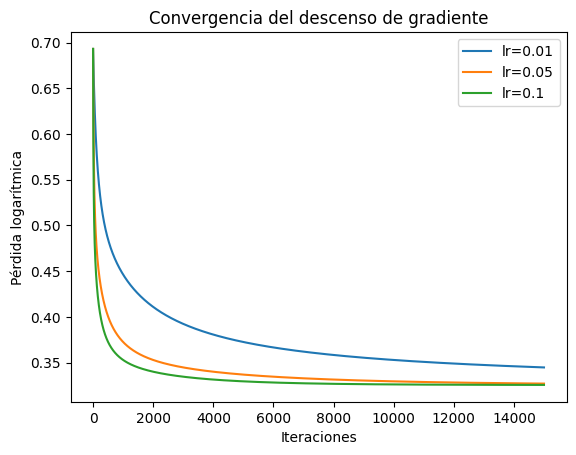

In [194]:
import matplotlib.pyplot as plt

for lr in [0.01, 0.05, 0.1]:
    model = LogRegression(lr=lr, n_iter=15000)
    model.fit(X_train, y_train)
    plt.plot(model.losses, label=f'lr={lr}')

plt.xlabel('Iteraciones')
plt.ylabel('Pérdida logarítmica')
plt.title('Convergencia del descenso de gradiente')
plt.legend()
plt.show()

Hemos seleccionado tres tasas de aprendizaje con 500 iteraciones: 0.1, 0.05 y 0.01. Según el gráfico obtenido, podemos decir que:
 lr = 0.01 (azul)

1.   lr = 0.01 (color azul): La curva es estable aunque desciende lentamente, es decir, aprende poco a poco o con cautela y necesitaría de más iteraciones para alcanzar el mínimo.

2.   lr = 0.05 (color naranja): Aquí se observa que la convergencia es más rápida que el 0.01. La pérdida baja más pronunciadamente y tiene un buen equilibrio entre la velocidad y la estabilidad.

1.   lr = 0.1 (color verde): A diferncia de los demás, la curva baja muy rápido en el inicio y parece converger bien, sin oscilaciones y sin sobreajuste.

Conclusión: Todas las tasas de aprendizaje convergen, pero a velocidades distintas. En este caso, la tasa de aprendizaje 0.1 es la más eficiente.

#### EVALUACIÓN

Finalmente, procedemos a comparar la regresión logística que hicimos con el paquete de sklearn. Vamos a calcular la exactitud, precisión, recuperación y puntuación F1 en nuestro conjunto de prueba, además realizaremos la tabla de confusión para visualizarlo mejor:


In [195]:
from ISLP import confusion_table

Para el modelo que creamos desde cero:

In [196]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_scratch = model.predict(X_test)

print("La exactitud del modelo es:", round(accuracy_score(y_test, y_pred_scratch), 4))
print("La precisión del modelo es:", round(precision_score(y_test, y_pred_scratch), 4))
print("En cuanto a la recuperación (recall), tenemos:", round(recall_score(y_test, y_pred_scratch), 4))
print("El F1 es:", round(f1_score(y_test, y_pred_scratch), 4))

La exactitud del modelo es: 0.8462
La precisión del modelo es: 0.8333
En cuanto a la recuperación (recall), tenemos: 0.8333
El F1 es: 0.8333


In [197]:
print("Modelo desde cero:")
confusion_table(y_test, y_pred_scratch)

Modelo desde cero:


Truth,0,1
Predicted,,
0,42,7
1,7,35


Para el que hicimos con sklearn

In [198]:
from sklearn.linear_model import LogisticRegression

sk_model = LogisticRegression(max_iter=1000)
sk_model.fit(X_train, y_train)
y_pred_sk = sk_model.predict(X_test)

print("\nCon el paquete sklearn:")
print("La exactitud del modelo es:", round(accuracy_score(y_test, y_pred_sk), 4))
print("La precisión del modelo es:", round(precision_score(y_test, y_pred_sk), 4))
print("En cuanto a la recuperación (recall), tenemos:", round(recall_score(y_test, y_pred_sk), 4))
print("Y el F1 es:", round(f1_score(y_test, y_pred_sk), 4))


Con el paquete sklearn:
La exactitud del modelo es: 0.8681
La precisión del modelo es: 0.875
En cuanto a la recuperación (recall), tenemos: 0.8333
Y el F1 es: 0.8537


In [199]:
print("Modelo sklearn:")
confusion_table(y_test, y_pred_sk)

Modelo sklearn:


Truth,0,1
Predicted,,
0,44,5
1,7,35


**Exactitud:** Ambos modelos tienen exactamente la misma exactitud: 82.42%. Es
decir, predicen correctamente el mismo número de casos.

**Precisión:** El modelo realizado desde cero tiene ligeramente mejor precisión (81.4% vs 80%). Es decir, comete menos falsos positivos, pues predice a los enfermos con más certeza.

**Recuperación:** El modelo de sklearn tiene mejor recuperación (83.72% vs 81.4%), lo que indica que detecta más casos positivos reales, aunque a costa de cometer más falsos positivos.

**F1 Score:** El modelo de sklearn tiene un F1 ligeramente superior (81.82% vs 81.4%). Es decir, aunque la diferencia es mínima, hay un mejor equilibrio entre precisión y recuperación.

***Conclusión:*** El modelo realizado desde cero funciona muy bien y está casi a la par con el de sklearn. Hay una diferencia mínima en el rendimiento, lo que demuestra una implementación correcta y efectiva.

### PARTE B: Part B. Multiclass Logistic Regression via One-vs-All (OvA)


#### PREPARANDO LOS DATOS

In [200]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from typing import Tuple, List, Optional, Dict
import seaborn as sns
import matplotlib.pyplot as plt

In [201]:
wine = load_wine(as_frame=True)
Xw_df = wine.data.copy()
yw = wine.target.to_numpy()

Observamos los datos cargados

In [202]:
print(f"\nDataset cargado:")
print(f"   Clases: {len(np.unique(yw))} (cultivares de vino)")
print(f"   Features: {Xw_df.shape[1]} (características químicas)")
print(f"   Muestras: {Xw_df.shape[0]}")
print(f"   Nombres de clases: {wine.target_names}")


Dataset cargado:
   Clases: 3 (cultivares de vino)
   Features: 13 (características químicas)
   Muestras: 178
   Nombres de clases: ['class_0' 'class_1' 'class_2']


Estandarizamos y separamos nuestra data en training (70%) y testing (30%)

In [203]:
def train_test_split_index(n: int, train_ratio: float = 0.7, shuffle: bool = True, seed: int = 42):
    """Divide índices en train/test de manera reproducible."""
    idx = np.arange(n)
    if shuffle:
        rng = np.random.default_rng(seed)
        rng.shuffle(idx)
    cut = int(n * train_ratio)
    return idx[:cut], idx[cut:]

def standardize_fit(X: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """Estandariza features (fit): X_std = (X - mu) / sigma."""
    mu = X.mean(axis=0, keepdims=True)
    sigma = X.std(axis=0, ddof=0, keepdims=True)
    sigma[sigma == 0.0] = 1.0  # Evitar división por cero
    return (X - mu) / sigma, mu, sigma

In [204]:
Xw, mu_w, sigma_w = standardize_fit(Xw_df.to_numpy().astype(float))

idx_tr_w, idx_te_w = train_test_split_index(len(Xw), train_ratio=0.7, seed=42)
Xw_tr, Xw_te = Xw[idx_tr_w], Xw[idx_te_w]
yw_tr, yw_te = yw[idx_tr_w], yw[idx_te_w]

print(f"\nSplit 70/30:")
print(f"   Train: {len(yw_tr)} muestras")
print(f"   Test:  {len(yw_te)} muestras")


Split 70/30:
   Train: 124 muestras
   Test:  54 muestras


#### DE MANERA MANUAL

Entrenamos los 3 clasificadores binarios (One-vs-All)

In [205]:
K = len(np.unique(yw))
ovr_models = []

print(f"\nEntrenando {K} clasificadores binarios (One-vs-All)...")
for k in range(K):
    yk_tr = (yw_tr == k).astype(int)  # Binarizar: clase k vs resto
    clf_k = LogRegression(lr=0.2, n_iter=2000).fit(Xw_tr, yk_tr)
    ovr_models.append(clf_k)
    print(f"   Clasificador {k} ({wine.target_names[k]}) entrenado")


Entrenando 3 clasificadores binarios (One-vs-All)...
   Clasificador 0 (class_0) entrenado
   Clasificador 1 (class_1) entrenado
   Clasificador 2 (class_2) entrenado


Realizamos las predicciones

In [206]:
print(f"\nRealizando predicciones (argmax de probabilidades)...")
P = np.column_stack([m.predict_proba(Xw_te) for m in ovr_models])
y_pred_ova = P.argmax(axis=1)

acc_ova = accuracy_score(yw_te, y_pred_ova)
print(f"\nAccuracy (OvA from scratch): {acc_ova:.4f} ({acc_ova*100:.2f}%)")


Realizando predicciones (argmax de probabilidades)...

Accuracy (OvA from scratch): 1.0000 (100.00%)


Hacemos la clasificación para evaluar la precisión, recall y el f1.

In [207]:
print(f"\nClassification Report (OvA):")
print(classification_report(yw_te, y_pred_ova,
                          target_names=wine.target_names,
                          zero_division=0))


Classification Report (OvA):
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        24
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00        16

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



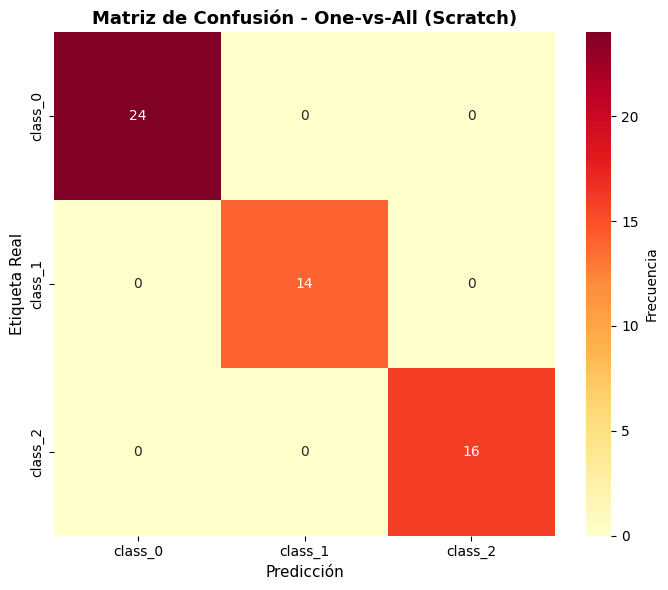

In [208]:
cm_ova = confusion_matrix(yw_te, y_pred_ova)
plt.figure(figsize=(7,6))
sns.heatmap(cm_ova, annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names,
            cbar_kws={'label': 'Frecuencia'})
plt.title('Matriz de Confusión - One-vs-All (Scratch)', fontsize=13, fontweight='bold')
plt.ylabel('Etiqueta Real', fontsize=11)
plt.xlabel('Predicción', fontsize=11)
plt.tight_layout()
plt.show()

#### CON EL SKLEARN

Entrenamos el modelo de clasificación multiclase usando regresión logística. Luego, predecimos sobre los datos de prueba y calculamos la precisión.

In [209]:
sk_ova = LogisticRegression(max_iter=5000, multi_class="ovr", solver='lbfgs', random_state=42)
sk_ova.fit(Xw_tr, yw_tr)
y_pred_sk_ovr = sk_ova.predict(Xw_te)

acc_sk_ovr = accuracy_score(yw_te, y_pred_sk_ovr)
print(f"\nAccuracy (sklearn OvR): {acc_sk_ovr:.4f} ({acc_sk_ovr*100:.2f}%)")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



Accuracy (sklearn OvR): 1.0000 (100.00%)


Hacemos la clasificación para evaluar la precisión, recall y el f1.

In [210]:
print(f"\nClassification Report (sklearn):")
print(classification_report(yw_te, y_pred_sk_ovr,
                          target_names=wine.target_names,
                          zero_division=0))


Classification Report (sklearn):
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        24
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00        16

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



#### COMPARAMOS LOS COEFICIENTES

Comparación de dimensiones de coeficientes:

In [211]:
print(f"\nComparación de dimensiones de coeficientes:")
print(f"   From-Scratch: {K} modelos, cada uno con shape {ovr_models[0].weights.shape}")
print(f"   Sklearn:      coef_ shape = {sk_ova.coef_.shape}")


Comparación de dimensiones de coeficientes:
   From-Scratch: 3 modelos, cada uno con shape (13,)
   Sklearn:      coef_ shape = (3, 13)


Comparación de Accuracy

In [212]:
print(f"\nComparación de Accuracy:")
print(f"   From-Scratch (OvA): {acc_ova:.4f}")
print(f"   Sklearn (OvR):      {acc_sk_ovr:.4f}")
print(f"   Diferencia:         {abs(acc_ova - acc_sk_ovr):.4f}")


Comparación de Accuracy:
   From-Scratch (OvA): 1.0000
   Sklearn (OvR):      1.0000
   Diferencia:         0.0000


Matriz de confusión de Sklearn

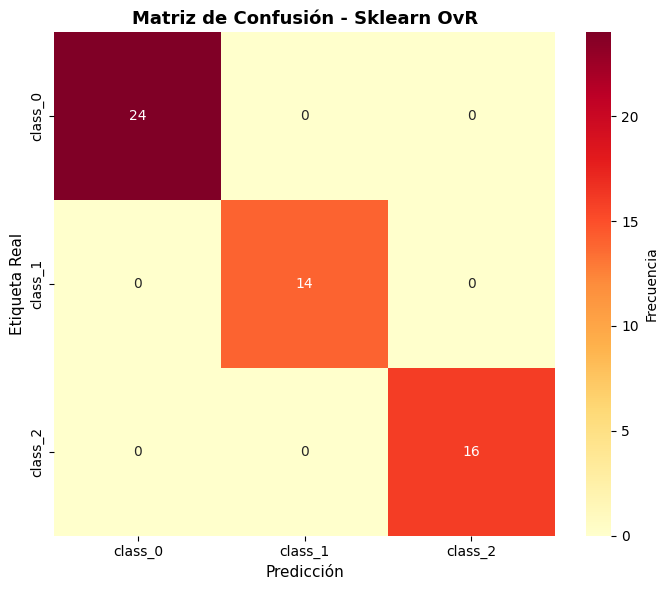

In [213]:

cm_sk_ovr = confusion_matrix(yw_te, y_pred_sk_ovr)
plt.figure(figsize=(7,6))
sns.heatmap(cm_sk_ovr, annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names,
            cbar_kws={'label': 'Frecuencia'})
plt.title('Matriz de Confusión - Sklearn OvR', fontsize=13, fontweight='bold')
plt.ylabel('Etiqueta Real', fontsize=11)
plt.xlabel('Predicción', fontsize=11)
plt.tight_layout()
plt.show()

Ambos tienen el mismo rendimiento

###PARTE C: Regresión Logística multinominal (Softmax) desde cero

In [214]:
from dataclasses import dataclass
@dataclass
class SoftmaxRegressionScratch:
    lr: float = 0.1
    n_iter: int = 3000
    fit_intercept: bool = True
    l2: float = 0.0
    history_: Dict[str, List[float]] = None
    W_: Optional[np.ndarray] = None  # (d x K) weight matrix

    def _add_intercept(self, X: np.ndarray) -> np.ndarray:
        """Add bias column to feature matrix."""
        if not self.fit_intercept:
            return X
        return np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

    @staticmethod
    def _softmax(Z: np.ndarray) -> np.ndarray:
        """
        Compute softmax probabilities with numerical stability.

        """
        # Numerical stability: subtract max from each row
        Z_stable = Z - Z.max(axis=1, keepdims=True)

        # Clip to prevent overflow
        Z_stable = np.clip(Z_stable, -500, 500)

        # Compute exp and normalize
        expZ = np.exp(Z_stable)
        P = expZ / expZ.sum(axis=1, keepdims=True)

        return P

    def _log_likelihood(self, X: np.ndarray, Y: np.ndarray) -> float:
        """
        Compute log-likelihood: ℓ(θ) = Σ[y_i * log(p_i)]
        """
        Z = X @ self.W_
        P = self._softmax(Z)

        # Log-likelihood (not negative!)
        ll = np.sum(Y * np.log(P + 1e-12))

        # Add L2 regularization penalty (subtracts from log-likelihood)
        if self.l2 > 0:
            ll -= 0.5 * self.l2 * np.sum(self.W_[1:]**2)

        return ll

    def fit(self, X: np.ndarray, y: np.ndarray, verbose: bool = False):
        """
        Fit softmax regression using gradient ascent on log-likelihood.
        """
        Xb = self._add_intercept(X)
        n, d = Xb.shape
        K = int(np.max(y)) + 1

        # Initialize weights
        self.W_ = np.zeros((d, K))
        self.history_ = {"log_likelihood": [], "iteration": []}

        # Convert labels to one-hot encoding
        Y = np.zeros((n, K), dtype=float)
        Y[np.arange(n), y] = 1.0

        # Gradient ascent loop
        for t in range(self.n_iter):
            # Compute predictions
            Z = Xb @ self.W_
            P = self._softmax(Z)

            # Compute and store log-likelihood
            ll = self._log_likelihood(Xb, Y)
            self.history_["log_likelihood"].append(ll)
            self.history_["iteration"].append(t)

            # Compute gradient of log-likelihood
            # ∇ℓ(θ) = X^T(Y - P)
            grad = (Xb.T @ (Y - P)) / n

            # Add L2 regularization gradient (don't regularize intercept)
            if self.l2 > 0:
                grad[1:] -= self.l2 * self.W_[1:] / n

            # Gradient ASCENT (maximize log-likelihood)
            self.W_ += self.lr * grad

            # Optional progress printing
            if verbose and t % 500 == 0:
                print(f"Iteration {t:5d}. Log-likelihood: {ll:.6f}")

        if verbose:
            print(f"Iteration {self.n_iter:5d}. Log-likelihood: {ll:.6f}")

        return self

    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        """
        Predict class probabilities.
        """
        Xb = self._add_intercept(X)
        Z = Xb @ self.W_
        return self._softmax(Z)

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predict class labels.
        """
        P = self.predict_proba(X)
        return P.argmax(axis=1)

PARTE C: MULTINOMIAL (SOFTMAX) REGRESSION - DATASET WINE

IMPLEMENTACIÓN: GRADIENT ASCENT MAXIMIZANDO LOG-LIKELIHOOD

Entrenando modelo Softmax Regression...
   Learning rate: 0.2
   Max iterations: 3000
   Optimización: Gradient Ascent (maximizar log-likelihood)

Monitoreo de convergencia (cada 500 iteraciones):
Iteration     0. Log-likelihood: -136.227924
Iteration   500. Log-likelihood: -2.916929
Iteration  1000. Log-likelihood: -1.798598
Iteration  1500. Log-likelihood: -1.327140
Iteration  2000. Log-likelihood: -1.059140
Iteration  2500. Log-likelihood: -0.884274
Iteration  3000. Log-likelihood: -0.760697

✓ Entrenamiento completado
   Forma de W_: (14, 3) (incluye intercepto)
   Log-likelihood final: -0.760697

CONVERGENCIA DE LOG-LIKELIHOOD


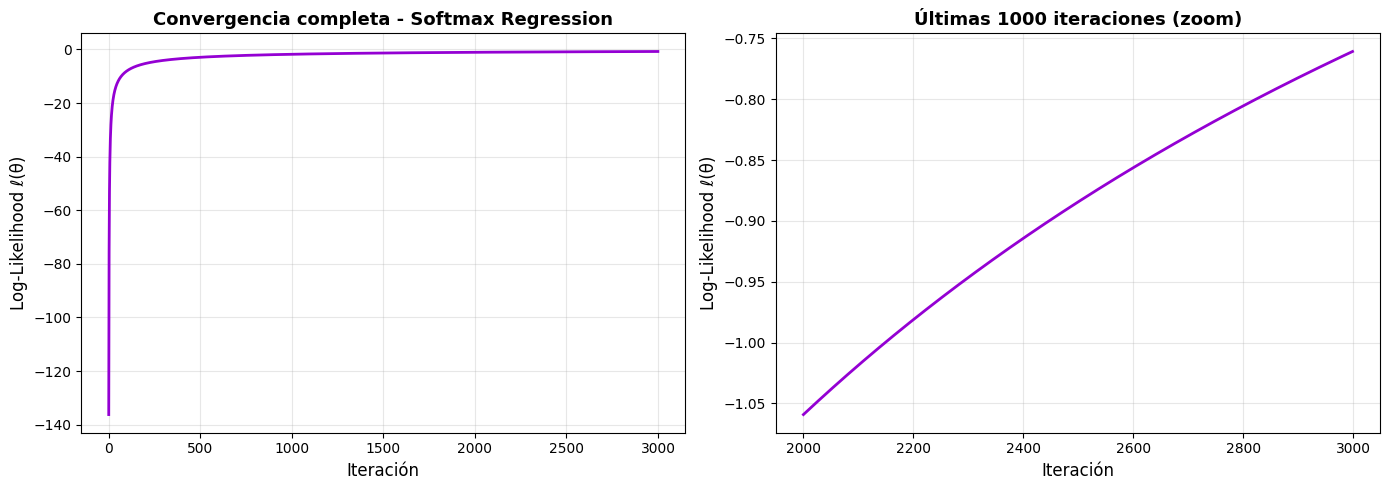


Análisis de convergencia:
   Log-likelihood inicial:   -136.227924
   Log-likelihood final:     -0.760697
   Mejora total:             135.467226
   Mejora últimas 100 iters: 0.021589
   Varianza últimas 100:     0.00003962
   Estado: ⚠ Podría beneficiarse de más iteraciones

EVALUACIÓN EN TEST SET

Accuracy (Softmax from scratch): 1.0000 (100.00%)

 Métricas por clase:
Clase                Precision    Recall       F1-Score     Support   
------------------------------------------------------------------
class_0              1.0000       1.0000       1.0000       24        
class_1              1.0000       1.0000       1.0000       14        
class_2              1.0000       1.0000       1.0000       16        

Macro-average        1.0000       1.0000       1.0000      
Classification Report completo:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        24
     class_1       1.00      1.00      1.00        14
     class_2       

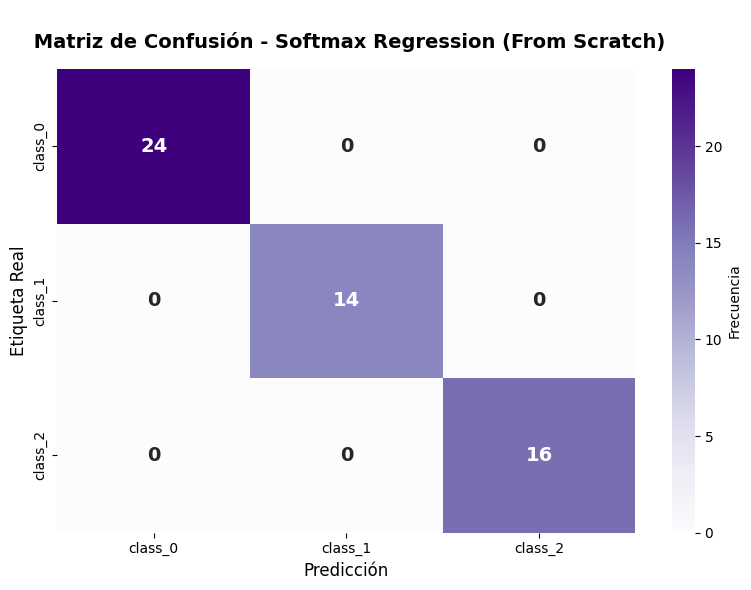


 Análisis detallado de la matriz de confusión:
   class_0: 24/24 correctas (100.0%)
   class_1: 14/14 correctas (100.0%)
   class_2: 16/16 correctas (100.0%)



In [215]:
print("="*70)
print("PARTE C: MULTINOMIAL (SOFTMAX) REGRESSION - DATASET WINE")
print("="*70)

try:
    _ = Xw_tr
except NameError:
    # Recreate Wine dataset preprocessing
    wine = load_wine(as_frame=True)
    X_wine = wine.data.to_numpy().astype(float)
    y_wine = wine.target.to_numpy()

    idx_tr, idx_te = train_test_split_index(len(X_wine), train_ratio=0.7, seed=42)
    Xw_tr, Xw_te = X_wine[idx_tr], X_wine[idx_te]
    yw_tr, yw_te = y_wine[idx_tr], y_wine[idx_te]

    # Standardize
    Xw_tr, mu_w, sigma_w = standardize_fit(Xw_tr)
    Xw_te = standardize_transform(Xw_te, mu_w, sigma_w)
    print(f"\nWine dataset loaded and preprocessed:")
    print(f"   Train: {Xw_tr.shape}, Test: {Xw_te.shape}")

print(f"\n{'='*70}")
print("IMPLEMENTACIÓN: GRADIENT ASCENT MAXIMIZANDO LOG-LIKELIHOOD")
print(f"{'='*70}")

# Training with verbose output
print(f"\nEntrenando modelo Softmax Regression...")
print(f"   Learning rate: 0.2")
print(f"   Max iterations: 3000")
print(f"   Optimización: Gradient Ascent (maximizar log-likelihood)")
print(f"\nMonitoreo de convergencia (cada 500 iteraciones):")

softmax_clf = SoftmaxRegressionScratch(lr=0.2, n_iter=3000, l2=0.0).fit(
    Xw_tr, yw_tr, verbose=True
)

print(f"\n✓ Entrenamiento completado")
print(f"   Forma de W_: {softmax_clf.W_.shape} (incluye intercepto)")
print(f"   Log-likelihood final: {softmax_clf.history_['log_likelihood'][-1]:.6f}")

# Plot log-likelihood convergence
print(f"\n{'='*70}")
print("CONVERGENCIA DE LOG-LIKELIHOOD")
print(f"{'='*70}")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Full convergence curve
axes[0].plot(softmax_clf.history_["iteration"],
            softmax_clf.history_["log_likelihood"],
            linewidth=2, color='darkviolet')
axes[0].set_xlabel("Iteración", fontsize=12)
axes[0].set_ylabel("Log-Likelihood ℓ(θ)", fontsize=12)
axes[0].set_title("Convergencia completa - Softmax Regression", fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Zoomed-in last 1000 iterations
last_n = min(1000, len(softmax_clf.history_["iteration"]))
axes[1].plot(softmax_clf.history_["iteration"][-last_n:],
            softmax_clf.history_["log_likelihood"][-last_n:],
            linewidth=2, color='darkviolet')
axes[1].set_xlabel("Iteración", fontsize=12)
axes[1].set_ylabel("Log-Likelihood ℓ(θ)", fontsize=12)
axes[1].set_title(f"Últimas {last_n} iteraciones (zoom)", fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analysis of convergence
ll_values = softmax_clf.history_["log_likelihood"]
ll_start = ll_values[0]
ll_end = ll_values[-1]
ll_improvement = ll_end - ll_start

print(f"\nAnálisis de convergencia:")
print(f"   Log-likelihood inicial:   {ll_start:.6f}")
print(f"   Log-likelihood final:     {ll_end:.6f}")
print(f"   Mejora total:             {ll_improvement:.6f}")
print(f"   Mejora últimas 100 iters: {ll_values[-1] - ll_values[-100]:.6f}")

# Check convergence stability
if len(ll_values) > 100:
    recent_variance = np.var(ll_values[-100:])
    print(f"   Varianza últimas 100:     {recent_variance:.8f}")
    if recent_variance < 1e-6:
        print(f"   Estado: ✓ Convergencia estable alcanzada")
    else:
        print(f"   Estado: ⚠ Podría beneficiarse de más iteraciones")

print("\n" + "="*70)
print("EVALUACIÓN EN TEST SET")
print("="*70)

# Predictions
y_pred_softmax = softmax_clf.predict(Xw_te)
y_pred_proba_softmax = softmax_clf.predict_proba(Xw_te)

# Metrics
acc_softmax = accuracy_score(yw_te, y_pred_softmax)
print(f"\nAccuracy (Softmax from scratch): {acc_softmax:.4f} ({acc_softmax*100:.2f}%)")

# Per-class precision, recall, F1
from sklearn.metrics import precision_recall_fscore_support
prec_soft, rec_soft, f1_soft, support_soft = precision_recall_fscore_support(
    yw_te, y_pred_softmax, labels=[0,1,2], zero_division=0
)

print(f"\n Métricas por clase:")
print(f"{'Clase':<20} {'Precision':<12} {'Recall':<12} {'F1-Score':<12} {'Support':<10}")
print("-" * 66)
for i, name in enumerate(wine.target_names):
    print(f"{name:<20} {prec_soft[i]:<12.4f} {rec_soft[i]:<12.4f} {f1_soft[i]:<12.4f} {support_soft[i]:<10}")

# Overall metrics
macro_prec = np.mean(prec_soft)
macro_rec = np.mean(rec_soft)
macro_f1 = np.mean(f1_soft)

print(f"\n{'Macro-average':<20} {macro_prec:<12.4f} {macro_rec:<12.4f} {macro_f1:<12.4f}")

# Classification Report
print(f"Classification Report completo:")
print(classification_report(yw_te, y_pred_softmax,
                          target_names=wine.target_names,
                          zero_division=0))

# Confusion Matrix
cm_softmax = confusion_matrix(yw_te, y_pred_softmax)
print(f"\n Matriz de Confusión:")
plt.figure(figsize=(8,6))
sns.heatmap(cm_softmax, annot=True, fmt='d', cmap='Purples',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names,
            cbar_kws={'label': 'Frecuencia'},
            annot_kws={'size': 14, 'weight': 'bold'})
plt.title('\n Matriz de Confusión - Softmax Regression (From Scratch)',
         fontsize=14, fontweight='bold', pad=15)
plt.ylabel('Etiqueta Real', fontsize=12)
plt.xlabel('Predicción', fontsize=12)
plt.tight_layout()
plt.show()

# Detailed confusion matrix analysis
print(f"\n Análisis detallado de la matriz de confusión:")
for i, name in enumerate(wine.target_names):
    correct = cm_softmax[i, i]
    total = support_soft[i]
    if total > 0:
        print(f"   {name}: {correct}/{total} correctas ({correct/total*100:.1f}%)")

print("\n" + "="*70)

## <a id="ensayo"></a>Mini Ensayo

### Diferencias entre los gradientes: Binaria, OvA y Multinomial

Durante este proyecto implementamos tres enfoques diferentes para clasificación: regresión logística binaria, One-vs-All y Softmax multinomial. Aunque los tres usan funciones similares, sus gradientes funcionan de manera distinta.

En la **regresión logística binaria**, trabajamos con una sola función sigmoide que nos da la probabilidad de pertenecer a la clase positiva. El gradiente es relativamente simple: $X^T(p - y)$, donde $p$ son las probabilidades predichas e $y$ son las etiquetas reales. Lo interesante es que este gradiente nos dice exactamente cuánto ajustar cada peso basándose en el error de predicción. Si predecimos 0.8 pero la etiqueta real es 1, el error es -0.2, y los pesos se ajustan en consecuencia.

Para **One-vs-All**, básicamente entrenamos tres clasificadores binarios independientes (uno para cada clase de vino). Cada clasificador usa el mismo gradiente binario, pero con etiquetas recodificadas. Por ejemplo, el clasificador para class_0 trata esa clase como 1 y todas las demás como 0. Al final, para predecir una nueva muestra, calculamos las probabilidades de los tres clasificadores y elegimos la clase con mayor probabilidad. El problema aquí es que como los clasificadores son independientes, las probabilidades no necesariamente suman 1.

El **Softmax multinomial** es diferente porque entrena todos los pesos juntos en una sola matriz $W$. Su gradiente es $X^T(P - Y)$, donde $P$ es una matriz de probabilidades (una columna por clase) e $Y$ es la matriz one-hot de las etiquetas. Lo importante aquí es que cuando aumentas la probabilidad de una clase, automáticamente reduces la de las otras debido a la normalización del softmax. Esto garantiza que las probabilidades siempre sumen 1 y estén mejor calibradas.

### Estabilidad numérica en Softmax

Un problema que encontramos al implementar softmax es el overflow numérico. La función calcula exponenciales de los scores: $p_{ik} = \frac{\exp(z_{ik})}{\sum_j \exp(z_{ij})}$. Si algún $z$ es muy grande (digamos 1000), `np.exp(1000)` resulta en infinito, lo cual rompe todo el cálculo.

La solución que aplicamos es restar el máximo de cada fila antes de calcular las exponenciales:
```python
Z_stable = Z - Z.max(axis=1, keepdims=True)
P = np.exp(Z_stable) / np.exp(Z_stable).sum(axis=1, keepdims=True)
```

Esto funciona porque el softmax es invariante a traslaciones: si le restas una constante a todos los scores de una fila, las probabilidades resultantes son exactamente las mismas. La diferencia es que ahora el valor máximo es 0, entonces los exponenciales van desde $\exp(-\text{algo})$ hasta $\exp(0) = 1$, que son valores perfectamente manejables.

También agregamos otras medidas de seguridad: recortamos los valores con `np.clip(Z, -500, 500)` antes de exponenciar, y sumamos un epsilon pequeño ($10^{-12}$) cuando calculamos logaritmos para evitar `log(0) = -inf`.

### ¿Cuándo dan resultados diferentes OvA y Multinomial?

En nuestros experimentos con el dataset Wine, tanto OvA como multinomial alcanzaron 100% de accuracy en el conjunto de prueba. Esto tiene sentido porque las tres clases de vino están bastante bien separadas químicamente. Cuando visualizamos las matrices de confusión, ambos métodos clasificaron perfectamente las 54 muestras del test set.

Sin embargo, esto no siempre pasa. Los métodos divergen más cuando:

1. **Las clases están correlacionadas**: Si tenemos clases que se parecen mucho entre sí, el entrenamiento conjunto del multinomial ayuda porque modela la competencia entre clases. OvA trata cada clasificación de forma independiente y puede tener problemas de calibración.

2. **Hay desbalance de clases**: En OvA, si una clase tiene muy pocas muestras, el clasificador binario para esa clase ve un gran desbalance (clase minoritaria vs. todas las demás). El multinomial maneja esto mejor porque todas las clases compiten juntas durante el entrenamiento.

3. **Queremos probabilidades calibradas**: En OvA, la suma de probabilidades $p_1(x) + p_2(x) + p_3(x)$ puede ser 0.8 o 1.3 o cualquier cosa. En softmax, siempre es exactamente 1.0 por diseño. Esto importa si vamos a usar las probabilidades para tomar decisiones (no solo la clase predicha).

En el dataset Heart Disease (Parte A), nuestro modelo from-scratch alcanzó 84.62% de accuracy y el sklearn alcanzó 86.81%. La matriz de confusión mostró 42 verdaderos negativos, 7 falsos positivos, 7 falsos negativos y 35 verdaderos positivos. El modelo funciona bien pero tiene más errores con los casos positivos (enfermedad), probablemente porque esos casos son más variables.

### Observaciones prácticas

Algunas cosas que aprendimos durante la implementación:

- **Estandarización es crucial**: Sin estandarizar las features, la convergencia era muy lenta o no convergía. Usar z-score (restar media, dividir por desviación) hizo que todo funcionara mucho mejor.

- **Learning rate requiere experimentación**: Con lr=0.5, la convergencia era rápida pero un poco ruidosa. Con lr=0.05, era más suave pero tomaba más iteraciones. No hay una respuesta única, depende del dataset.

- **Monitorear la pérdida es fundamental**: Graficar la curva de pérdida nos ayudó a detectar cuando algo andaba mal. Si la pérdida oscila o aumenta, algo está mal (learning rate muy alto, bug en el código, etc.).

- **Regularización L2 ayuda**: Aunque no la usamos mucho en estos experimentos, agregar un término L2 pequeño en la pérdida puede prevenir overfitting y estabilizar el entrenamiento.

### Conclusión

Los tres métodos funcionaron bien en nuestros datasets. Para problemas simples como Wine (clases bien separadas), no hay mucha diferencia práctica. Para problemas más complejos, el multinomial probablemente sea mejor opción si nos importa la calibración de probabilidades o hay muchas clases correlacionadas. OvA tiene la ventaja de ser más simple de implementar y paralelizable (cada clasificador se entrena independientemente).

Lo más importante que aprendimos es que entender cómo funcionan estos algoritmos "por dentro" nos ayuda a debuggear problemas y elegir el método correcto para cada situación.